In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.optimizers import Adam
from keras.optimizers import Adagrad
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from keras.models import Sequential
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [7]:
# Load the data from the excel file
df = pd.read_csv('processed_train.csv')

# Define the features and the target variable
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize the features to have a mean of 0 and a standard deviation of 1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Perform PCA on the training set
pca = PCA(n_components=0.95)
X_train = pca.fit_transform(X_train)

# Transform the test set using the PCA from the training set
X_test = pca.transform(X_test)

# Reconstruct the data by concatenating the features and the target variable
X_train_pca = pd.DataFrame(X_train, columns=["PCA_" + str(i+1) for i in range(X_train.shape[1])])
X_test_pca = pd.DataFrame(X_test, columns=["PCA_" + str(i+1) for i in range(X_test.shape[1])])

# Combine the features and the target variable
X_train_final = pd.concat([X_train_pca, pd.DataFrame(y_train, columns=["class"])], axis=1)
X_test_final = pd.concat([X_test_pca, pd.DataFrame(y_test, columns=["class"])], axis=1)

# Save the final training and test sets as excel files
X_train_final.to_csv('train_set_after_pca.csv', index=False)
X_test_final.to_csv('test_set_after_pca.csv', index=False)
from google.colab import files
files.download('train_set_after_pca.csv')
files.download('test_set_after_pca.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
# Training data
training_data = pd.read_csv('train_set_after_pca.csv')

# Testing data
testing_data = pd.read_csv('test_set_after_pca.csv')

In [9]:
# Training data
X_train = training_data.iloc[:, :-1].values
y_train = training_data.iloc[:, -1].values

# Testing data
X_test = testing_data.iloc[:, :-1].values
y_test = testing_data.iloc[:, -1].values

In [10]:
input_shape = (22,)#there are 22 principal features

modelpca = Sequential([
    Dense(128, input_shape=input_shape),
    Activation('sigmoid'),
    Dense(64, kernel_regularizer=l2(0.01)),
    Activation('relu'),
    Dense(64, kernel_regularizer=l2(0.01)),
    Activation('relu'),
    Dense(64, kernel_regularizer=l2(0.01)),
    Activation('relu'),
    Dropout(0.25),
    Dense(1),
    Activation('sigmoid')
])

modelpca.compile(Adagrad(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
modelpca.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2944      
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 activation_2 (Activation)   (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 64)                4

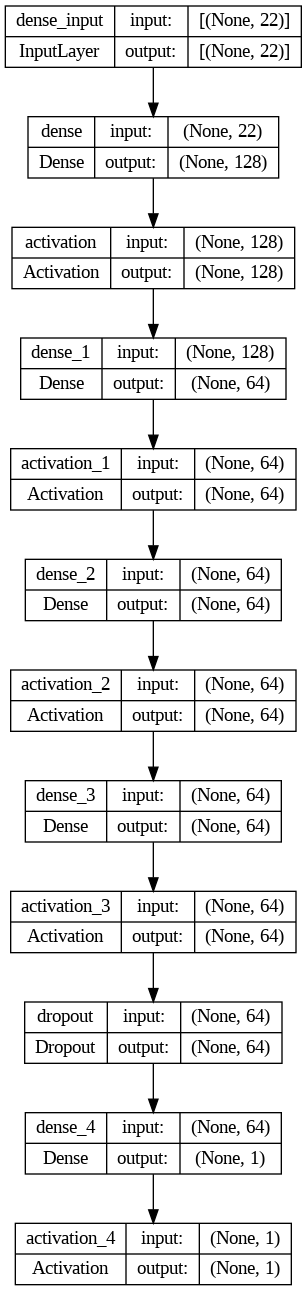

In [14]:
from keras.utils import plot_model
plot_model(modelpca, to_file='/content/drive/My Drive/Final year project/models/model architectures/modelpca.png', show_shapes=True, show_layer_names=True)

In [11]:
history = modelpca.fit(X_train, y_train, batch_size=32, epochs=30, validation_data=(X_test, y_test), callbacks=[EarlyStopping(patience=3)])

Epoch 1/30
630/630 [==============================] - 6s 6ms/step - loss: 2.6993 - accuracy: 0.6762 - val_loss: 2.5601 - val_accuracy: 0.8466
Epoch 2/30
630/630 [==============================] - 7s 11ms/step - loss: 2.4091 - accuracy: 0.8776 - val_loss: 2.2474 - val_accuracy: 0.9113
Epoch 3/30
630/630 [==============================] - 7s 12ms/step - loss: 2.1309 - accuracy: 0.9030 - val_loss: 2.0087 - val_accuracy: 0.9039
Epoch 4/30
630/630 [==============================] - 3s 5ms/step - loss: 1.9380 - accuracy: 0.9157 - val_loss: 1.8513 - val_accuracy: 0.9248
Epoch 5/30
630/630 [==============================] - 2s 3ms/step - loss: 1.8024 - accuracy: 0.9267 - val_loss: 1.7317 - val_accuracy: 0.9357
Epoch 6/30
630/630 [==============================] - 2s 3ms/step - loss: 1.6922 - accuracy: 0.9353 - val_loss: 1.6310 - val_accuracy: 0.9424
Epoch 7/30
630/630 [==============================] - 2s 3ms/step - loss: 1.5977 - accuracy: 0.9388 - val_loss: 1.5425 - val_accuracy: 0.9478
Epoc

In [12]:
modelpca.save('/content/drive/My Drive/Final year project/models/modelpca.keras')

In [ ]:
input_shape = (22,)

modelpca1 = Sequential([
    Dense(128, input_shape=input_shape),
    Activation('relu'),
    Dense(64, kernel_regularizer=l2(0.01)),
    Activation('relu'),
    Dense(64, kernel_regularizer=l2(0.01)),
    Activation('sigmoid'),
    Dense(64, kernel_regularizer=l2(0.01)),
    Activation('relu'),
    Dropout(0.35),
    Dense(1),
    Activation('sigmoid')
])

modelpca1.compile(Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = modelpca1.fit(X_train, y_train, batch_size=32, epochs=30, validation_data=(X_test, y_test), callbacks=[EarlyStopping(patience=3)])

Epoch 1/30
630/630 [==============================] - 4s 5ms/step - loss: 0.5249 - accuracy: 0.9488 - val_loss: 0.1798 - val_accuracy: 0.9706
Epoch 2/30
630/630 [==============================] - 4s 6ms/step - loss: 0.1634 - accuracy: 0.9692 - val_loss: 0.1446 - val_accuracy: 0.9716
Epoch 3/30
630/630 [==============================] - 2s 3ms/step - loss: 0.1434 - accuracy: 0.9710 - val_loss: 0.1330 - val_accuracy: 0.9714
Epoch 4/30
630/630 [==============================] - 2s 3ms/step - loss: 0.1336 - accuracy: 0.9727 - val_loss: 0.1227 - val_accuracy: 0.9722
Epoch 5/30
630/630 [==============================] - 2s 3ms/step - loss: 0.1250 - accuracy: 0.9722 - val_loss: 0.1367 - val_accuracy: 0.9677
Epoch 6/30
630/630 [==============================] - 2s 2ms/step - loss: 0.1188 - accuracy: 0.9746 - val_loss: 0.1135 - val_accuracy: 0.9772
Epoch 7/30
630/630 [==============================] - 3s 5ms/step - loss: 0.1091 - accuracy: 0.9761 - val_loss: 0.1077 - val_accuracy: 0.9738
Epoch 

In [ ]:
modelpca1.save('/content/drive/My Drive/Final year project/models/modelpca1.keras')

In [ ]:
input_shape = (22,)

modelpca2 = Sequential([
    Dense(128, input_shape=input_shape),
    Activation('relu'),
    Dense(64, kernel_regularizer=l2(0.01)),
    Activation('sigmoid'),
    Dense(64, kernel_regularizer=l2(0.01)),
    Activation('sigmoid'),
    Dense(64, kernel_regularizer=l2(0.01)),
    Activation('relu'),
    Dense(64, kernel_regularizer=l2(0.01)),
    Activation('relu'),
    Dropout(0.35),
    Dense(1),
    Activation('sigmoid')
])

modelpca2.compile(Adagrad(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history2 = modelpca2.fit(X_train, y_train, batch_size=15, epochs=20, validation_data=(X_test, y_test), callbacks=[EarlyStopping(patience=3)])

Epoch 1/20
1344/1344 [==============================] - 5s 3ms/step - loss: 3.2625 - accuracy: 0.5370 - val_loss: 3.0572 - val_accuracy: 0.5384
Epoch 2/20
1344/1344 [==============================] - 3s 3ms/step - loss: 2.8904 - accuracy: 0.5490 - val_loss: 2.7272 - val_accuracy: 0.5384
Epoch 3/20
1344/1344 [==============================] - 5s 3ms/step - loss: 2.5904 - accuracy: 0.5791 - val_loss: 2.4571 - val_accuracy: 0.5384
Epoch 4/20
1344/1344 [==============================] - 6s 4ms/step - loss: 2.3430 - accuracy: 0.6017 - val_loss: 2.2311 - val_accuracy: 0.5384
Epoch 5/20
1344/1344 [==============================] - 4s 3ms/step - loss: 2.1346 - accuracy: 0.6186 - val_loss: 2.0388 - val_accuracy: 0.5725
Epoch 6/20
1344/1344 [==============================] - 8s 6ms/step - loss: 1.9546 - accuracy: 0.6907 - val_loss: 1.8704 - val_accuracy: 0.6259
Epoch 7/20
1344/1344 [==============================] - 4s 3ms/step - loss: 1.7952 - accuracy: 0.7574 - val_loss: 1.7170 - val_accuracy:

In [ ]:
modelpca2.save('/content/drive/My Drive/Final year project/models/modelpca2.keras')

In [1]:
input_shape = (22,)

modelpca3 = Sequential([
    Dense(128, input_shape=input_shape),
    Activation('relu'),
    Dense(64, kernel_regularizer=l2(0.01)),
    Activation('sigmoid'),
    Dense(64, kernel_regularizer=l2(0.01)),
    Activation('sigmoid'),
    Dense(64, kernel_regularizer=l2(0.01)),
    Activation('relu'),
    Dense(64, kernel_regularizer=l2(0.01)),
    Activation('relu'),
    Dropout(0.35),
    Dense(1),
    Activation('sigmoid')
])

modelpca3.compile(Adagrad(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

NameError: ignored